In [12]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [13]:
tf.__version__,keras.__version__

('2.7.0', '2.7.0')

In [14]:
# load datasets
from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data[:,(2,3)]  # petal length, petal width
y= (iris.target==0).astype(int)  # iris satosa


In [5]:
from sklearn.linear_model import Perceptron
per_clf = Perceptron()   # cannot predict probability hence logistic regression is preferred
per_clf.fit(x,y)


Perceptron()

In [6]:
y_pred = per_clf.predict(x)

per_clf.predict([[2,0.4]])

array([1])

In [7]:
# Fashion Mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()


In [8]:
x_train_full.shape

(60000, 28, 28)

In [9]:
x_train_full.dtype

dtype('uint8')

In [10]:
# to convert in range 0 to 1 devide by 255
x_valid , x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid ,y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
x_test = x_test/255.0

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]]

'Coat'

In [14]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

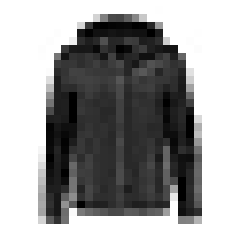

In [15]:
# plot using imshow() function
plt.imshow(x_train[0],cmap='binary')
plt.axis('off')
plt.show()


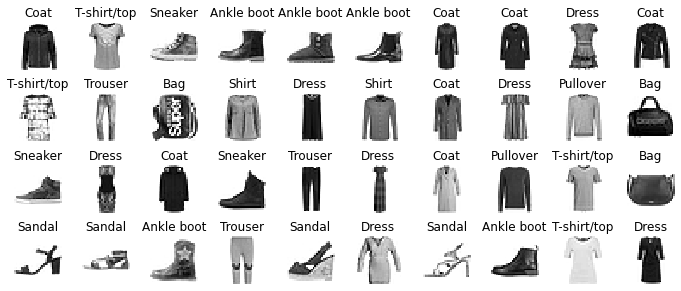

In [16]:
### Lets take a look at a sample of the images in the datasets
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols* row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(x_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


# creating the model

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))  # this is input layer input shape should be same as input data reshape the data (-1,1)
model.add(keras.layers.Dense(300,activation='relu'))   # hidden layer
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax')) # output layer

In [18]:
# also we can give list 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [19]:
model.summary() # gives the detail of each layer

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers # all model layers

In [21]:
model.layers[0] # we can access model with index

In [22]:
model.layers[1].name

'dense_3'

In [23]:

weights, biases = model.layers[1].get_weights()
weights
 

array([[-0.05177939, -0.01039828, -0.0296352 , ..., -0.02965904,
         0.06139103,  0.04473987],
       [ 0.07391009, -0.0220694 ,  0.00530468, ..., -0.0288437 ,
         0.04735459, -0.03388787],
       [-0.05505998, -0.00190049, -0.0445925 , ..., -0.02862849,
         0.00727793, -0.03244062],
       ...,
       [-0.00679514,  0.06430931,  0.04115899, ...,  0.06633283,
        -0.070967  ,  0.04920389],
       [-0.04122667, -0.04087649, -0.02569053, ...,  0.00800346,
        -0.05937903, -0.01759221],
       [-0.01727465,  0.02319501, -0.02392491, ...,  0.0663984 ,
        -0.01497582, -0.02968462]], dtype=float32)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

In [26]:
# compiling the model

In [27]:
# compile the model to specify loss function
model.compile(loss='sparse_categorical_crossentropy',
            optimizer='sgd',
            metrics=['accuracy']
)

In [28]:
# fit the model
history = model.fit(x_train,y_train,epochs=30,
        validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7143 - accuracy: 0.7674 - val_loss: 0.4891 - val_accuracy: 0.8344
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4853 - accuracy: 0.8313 - val_loss: 0.4599 - val_accuracy: 0.8408
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4401 - accuracy: 0.8463 - val_loss: 0.4194 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4118 - accuracy: 0.8551 - val_loss: 0.3956 - val_accuracy: 0.8634
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3922 - accuracy: 0.8615 - val_loss: 0.4407 - val_accuracy: 0.8318
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3756 - accuracy: 0.8672 - val_loss: 0.3793 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3626 - accuracy: 0.8714 - val_loss: 0.3598 - val_accuracy:

In [29]:
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [30]:
x_train.shape

(55000, 28, 28)

In [31]:
x_valid.shape

(5000, 28, 28)

In [32]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [33]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

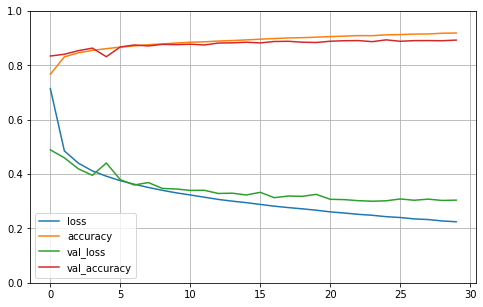

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  # set the vertical range (0-1)
plt.show()

- Good! Moreover, the validation
curves are quite close to the training curves, which means that there is not too
much overfitting.

In [36]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8818


[0.3374689519405365, 0.8817999958992004]

In [37]:
x_new = x_test[:3]
y_prob = model.predict(x_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
# predict the class
# y_pred = model.predict_classes() deprecated
y_pred = np.argmax(model.predict(x_new),axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [40]:
y_new= y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

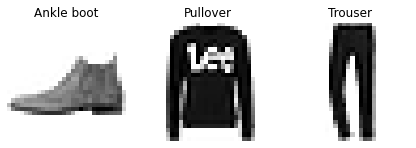

In [41]:
plt.figure(figsize=(7.2,2.4))
for index, image in enumerate(x_new):
    plt.subplot(1,3,index+1)
    plt.imshow(image,cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace= 0.2,hspace=0.5)
plt.show()

 # REgression MLP

In [15]:
# Regressin MLP using the Sequential API
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()  # default it takes test_size=0.25
x_train_full, x_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_full,y_train_full)


In [85]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [29]:
x_train[1]

array([   3.5272    ,   36.        ,    5.09556314,    1.07849829,
        989.        ,    3.37542662,   34.03      , -118.11      ])

In [84]:
y_train[1]

2.137

In [37]:
x_train.shape, 
sh=x_valid.shape[1:]
list(sh)

[8]

In [78]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)


# sequential API

In [79]:
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)])


In [81]:
model.compile(loss='mean_squared_error',
        optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [82]:
history = model.fit(x_train_scaled,y_train, epochs=20,  # scaled reuir
    validation_data = (x_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.6875 - val_loss: 0.8779
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7367 - val_loss: 0.6807
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6605 - val_loss: 0.6336
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6244 - val_loss: 0.6052
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5979 - val_loss: 0.5829
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5768 - val_loss: 0.5640
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5590 - val_loss: 0.5491
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5441 - val_loss: 0.5354
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5316 - val_loss: 0.5244
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5210 - val_loss: 0.5147

In [83]:
mse_test = model.evaluate(x_test_scaled,y_test)
x_new = x_test_scaled[:3]
y_pred = model.predict(x_new)
y_pred

162/162 [==============================] - 0s 2ms/step - loss: 0.4654


array([[1.1626673],
       [2.2538853],
       [3.2953992]], dtype=float32)

In [86]:
history.history

{'loss': [1.6875289678573608,
  0.7367174029350281,
  0.6604581475257874,
  0.6244286298751831,
  0.597902774810791,
  0.5767728090286255,
  0.5590286254882812,
  0.5441426634788513,
  0.5316370725631714,
  0.5210481286048889,
  0.5124092698097229,
  0.5045253038406372,
  0.49819761514663696,
  0.49255260825157166,
  0.48776379227638245,
  0.4834187924861908,
  0.47974464297294617,
  0.476339191198349,
  0.4734870493412018,
  0.4705533981323242],
 'val_loss': [0.8779119849205017,
  0.6807284951210022,
  0.6335744857788086,
  0.6052008867263794,
  0.582881510257721,
  0.5640347003936768,
  0.5490806102752686,
  0.5353524088859558,
  0.524397611618042,
  0.5146622061729431,
  0.5074985027313232,
  0.5011210441589355,
  0.49614569544792175,
  0.4912636876106262,
  0.4869641065597534,
  0.4830213487148285,
  0.47970712184906006,
  0.47692522406578064,
  0.4735362231731415,
  0.4709133803844452]}

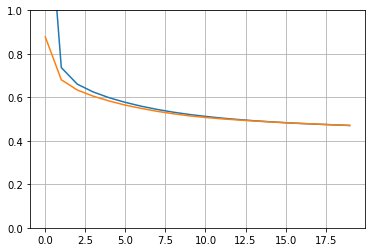

In [87]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# functional API

In [99]:
# complicated neural network
np.random.seed(42)
tf.random.set_seed(42)

In [104]:
input = keras.layers.Input(shape=x_train_scaled.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input],outputs=[output])

In [105]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 dense_38 (Dense)               (None, 30)           270         ['input_13[0][0]']               
                                                                                                  
 dense_39 (Dense)               (None, 30)           930         ['dense_38[0][0]']               
                                                                                                  
 concatenate_12 (Concatenate)   (None, 38)           0           ['input_13[0][0]',               
                                                                  'dense_39[0][0]']         

In [106]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train_scaled, y_train, epochs=20,
                    validation_data=(x_valid_scaled, y_valid))
mse_test = model.evaluate(x_test_scaled, y_test)
y_pred = model.predict(x_new)

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 1.7523 - val_loss: 0.7521
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7238 - val_loss: 0.6758
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6653 - val_loss: 0.6331
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6285 - val_loss: 0.6002
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5999 - val_loss: 0.5761
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5775 - val_loss: 0.5592
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5595 - val_loss: 0.5430
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5444 - val_loss: 0.5261
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5322 - val_loss: 0.5224
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5220 - val_loss: 0.5142

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [107]:
np.random.seed(42)
tf.random.set_seed(42)

In [108]:
# we can also send subset of features through the wide path and different subset through the deep path
# send 5 feature through the deep path and 6 features through the wide path
input_A = keras.layers.Input(shape=[5],name='wide_output')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='output')(concat)


In [110]:
model = keras.models.Model(inputs=[input_A,input_B],outputs=[output])

In [111]:
model.compile(loss='mse',optimizer='sgd')
x_train_A, x_train_B = x_train_scaled[:,:5],x_train_scaled[:,2:]
x_valid_A, x_valid_B = x_valid_scaled[:,:5],x_valid_scaled[:,2:]
x_test_A ,x_test_B = x_test_scaled[:,:5], x_test_scaled[:,2:]
x_new_A, x_new_B = x_test_A[:3],x_test_B[:3]

In [112]:
history = model.fit((x_train_A,x_train_B),y_train,epochs=20,
    validation_data=((x_valid_A,x_valid_B),y_valid))
mse_test = model.evaluate((x_test_A, x_test_B),y_test)


Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7804 - val_loss: 0.5205
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6223 - val_loss: 0.5219
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5142 - val_loss: 0.4868
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4748 - val_loss: 0.4795
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4620 - val_loss: 0.4520
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4528 - val_loss: 0.4437
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4420 - val_loss: 0.4438
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4351 - val_loss: 0.4283
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4305 - val_loss: 0.4172
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4445 - val_loss: 0.4455

In [113]:
y_pred = model.predict((x_new_A,x_new_B))
y_pred

array([[1.16139  ],
       [2.0545492],
       [3.4357877]], dtype=float32)

In [114]:
#### Adding an auxilliary output for regularization

In [118]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30,activation='relu')(input_B)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name='main_output')(concat)
aux_output = keras.layers.Dense(1,name='aux_output')(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],outputs=[output,aux_output])

In [119]:
# we can use the 2 loss function
model.compile(loss=['mse','mse'],loss_weights=[0.9,0.1],optimizer='sgd')

In [120]:
history = model.fit([x_train_A,x_train_B],[y_train,y_train],epochs=20,
        validation_data = ([x_valid_A,x_valid_B],[y_valid,y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.9555 - main_output_loss: 0.8704 - aux_output_loss: 1.7213 - val_loss: 0.5841 - val_main_output_loss: 0.5283 - val_aux_output_loss: 1.0868
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6667 - main_output_loss: 0.6263 - aux_output_loss: 1.0310 - val_loss: 0.5499 - val_main_output_loss: 0.5034 - val_aux_output_loss: 0.9679
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5260 - main_output_loss: 0.4848 - aux_output_loss: 0.8964 - val_loss: 0.5042 - val_main_output_loss: 0.4666 - val_aux_output_loss: 0.8425
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5039 - main_output_loss: 0.4712 - aux_output_loss: 0.7986 - val_loss: 0.4898 - val_main_output_loss: 0.4622 - val_aux_output_loss: 0.7386
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4829 - main_output_loss: 0.4555 - aux_output_loss: 0.7299 - val_loss

In [121]:
total_loss, main_loss ,aux_loss = model.evaluate(
    [x_test_A,x_test_B],[y_test,y_test])
y_pred_main,y_pred_aux = model.predict([x_new_A,x_new_B])

162/162 [==============================] - 1s 3ms/step - loss: 0.3717 - main_output_loss: 0.3565 - aux_output_loss: 0.5089


In [122]:
x_train

array([[   3.5481    ,   34.        ,    3.75539568, ...,    2.68345324,
          33.94      , -118.13      ],
       [   3.5272    ,   36.        ,    5.09556314, ...,    3.37542662,
          34.03      , -118.11      ],
       [   2.7179    ,   35.        ,    4.87634409, ...,    2.89247312,
          38.66      , -121.43      ],
       ...,
       [   6.1062    ,   16.        ,    7.30188679, ...,    2.96352201,
          33.65      , -117.69      ],
       [   4.375     ,   35.        ,    4.86453202, ...,    2.17241379,
          34.18      , -118.41      ],
       [   2.1856    ,   23.        ,    5.0418251 , ...,    2.74524715,
          34.13      , -117.38      ]])

# subclassing API

In [131]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self,units=30,activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units,activation=activation)
        self.hidden2 = keras.layers.Dense(units,activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self,inputs):
        input_A , input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output,aux_output


model = WideAndDeepModel(30,activation='relu')

In [132]:
model.compile(loss='mse',loss_weights=[0.9,0.1],optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((x_train_A,x_train_B),(y_train, y_train),
        epochs=10,validation_data = ((x_valid_A,x_valid_B),(y_valid,y_valid)))



Epoch 1/10
363/363 [==============================] - 3s 7ms/step - loss: 2.3705 - output_1_loss: 2.1957 - output_2_loss: 3.9436 - val_loss: 1.0943 - val_output_1_loss: 0.9195 - val_output_2_loss: 2.6675
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.9709 - output_1_loss: 0.8279 - output_2_loss: 2.2577 - val_loss: 0.8180 - val_output_1_loss: 0.7044 - val_output_2_loss: 1.8401
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.8063 - output_1_loss: 0.7072 - output_2_loss: 1.6980 - val_loss: 0.7309 - val_output_1_loss: 0.6430 - val_output_2_loss: 1.5227
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.7339 - output_1_loss: 0.6546 - output_2_loss: 1.4479 - val_loss: 0.6792 - val_output_1_loss: 0.6042 - val_output_2_loss: 1.3537
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6875 - output_1_loss: 0.6183 - output_2_loss: 1.3106 - val_loss: 0.6430 - val_output_1_loss: 0.5765 - val_ou

In [133]:
total_loss,main_loss, aux_loss = model.evaluate((x_test_A,x_test_B),(y_test,y_test))

162/162 [==============================] - 1s 3ms/step - loss: 0.5662 - output_1_loss: 0.5152 - output_2_loss: 1.0256


In [134]:
y_pred_main,y_pred_aux = model.predict((x_new_A,x_new_B))

In [136]:
y_pred_main,y_pred_aux

(array([[1.2460433],
        [2.4851236],
        [2.72234  ]], dtype=float32),
 array([[1.792833 ],
        [1.4703656],
        [1.8204968]], dtype=float32))

# saving and restoring

In [137]:
np.random.seed(42)
tf.random.set_seed(42)

In [140]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation= 'relu'),
    keras.layers.Dense(1)
])

In [141]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(x_train_scaled,y_train, epochs=10,validation_data = (x_valid_scaled,y_valid))
mse = model.evaluate(x_test_scaled,y_test)

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 1.9266 - val_loss: 0.7450
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6902 - val_loss: 0.6256
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6198 - val_loss: 0.5848
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5829 - val_loss: 0.5555
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5547 - val_loss: 0.5336
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5328 - val_loss: 0.5156
Epoch 7/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5156 - val_loss: 0.5033
Epoch 8/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5014 - val_loss: 0.4925
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4905 - val_loss: 0.4864
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4751


In [142]:
model.save('my_keras_model.h5')

In [144]:
model.predict(x_new)

array([[1.2567071],
       [1.4610482],
       [3.1041553]], dtype=float32)

In [145]:
model.save_weights('my_keras_weights.ckpt')

In [146]:
model.load_weights('my_keras_weights.ckpt')

In [147]:
# using callbacks during Training


In [149]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [151]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [152]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5',save_best_only=True)
history = model.fit(x_train_scaled,y_train,epochs=10,
        validation_data = (x_valid_scaled,y_valid),callbacks=[checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5')  # rollback to best  model
mse_best =model.evaluate(x_test_scaled,y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.9266 - val_loss: 0.7450
Epoch 2/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6902 - val_loss: 0.6256
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6198 - val_loss: 0.5848
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5829 - val_loss: 0.5555
Epoch 5/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5547 - val_loss: 0.5336
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5328 - val_loss: 0.5156
Epoch 7/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5156 - val_loss: 0.5033
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5014 - val_loss: 0.4925
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4905 - val_loss: 0.4864
Epoch 10/10
162/162 [==============================] - 1s 3ms/step - loss: 0.4751


In [156]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(x_train_scaled,y_train,epochs=100,
        validation_data = (x_valid_scaled,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

mse_test = model.evaluate(x_test_scaled,y_test)

Epoch 1/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4265 - val_loss: 0.4298
Epoch 2/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4249 - val_loss: 0.4309
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4237 - val_loss: 0.4286
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4226 - val_loss: 0.4252
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4211 - val_loss: 0.4251
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4200 - val_loss: 0.4227
Epoch 7/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4197 - val_loss: 0.4236
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4181 - val_loss: 0.4202
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4168 - val_loss: 0.4195
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4154 - val_lo

In [157]:
class PrintValTrainRetioCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch, logs):
        print("\nval/train: {:.2f}".format(logs['val_loss']/logs['loss']))

In [159]:
val_train_ratio_cb = PrintValTrainRetioCallback()
history = model.fit(x_train_scaled,y_train,epochs=1,
        validation_data=(x_valid_scaled,y_valid),callbacks=[val_train_ratio_cb])

358/363 [============================>.] - ETA: 0s - loss: 0.3496
val/train: 1.01
363/363 [==============================] - 2s 4ms/step - loss: 0.3490 - val_loss: 0.3523


# TensorBoard

In [161]:
import os
from os import path
root_logdir = os.path.join(os.curdir,'my_logs')

In [162]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)

In [163]:
run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_01_03-14_42_03'

In [164]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [166]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))


In [167]:
tesnorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x_train_scaled,y_train,epochs=30,
        validation_data = (x_valid_scaled,y_valid),
        callbacks= [checkpoint_cb,tesnorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 11ms/step - loss: 1.8714 - val_loss: 0.9872
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 0.8322 - val_loss: 0.7610
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.7423 - val_loss: 0.7036
Epoch 4/30
363/363 [==============================] - 2s 4ms/step - loss: 0.6949 - val_loss: 0.6623
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6567 - val_loss: 0.6277
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6239 - val_loss: 0.5975
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5953 - val_loss: 0.5715
Epoch 8/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5704 - val_loss: 0.5491
Epoch 9/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5491 - val_loss: 0.5301
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5305 - val_loss: 0.513

In [169]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006